<a href="https://colab.research.google.com/github/GuoZhuyin/zhuyinasia/blob/main/ArtificialIntelligence/AIprograme_NN_0521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
from google.colab import drive

In [ ]:
import os
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/MyDrive/亞洲大學/大二/人工智慧概論")

Mounted at /content/gdrive


In [ ]:
!dir

108022062郭銍恩.ipynb			AIprogram_list0326.ipynb
AIprogram0312.ipynb			AIprogram_RNN_0604.ipynb
AIprogram0319HW.ipynb			AIprogram_RNN_0611.ipynb
AIprogram0319.ipynb			Colab.docx
AIprogram0326.ipynb			Colab.pdf
AIprogram0409.ipynb			MOSTassistant1
AIprograme0507				my_model.json
AIprograme0514				my_model_weight.h5
AIprograme_CNN_0528.ipynb		my_weights.h5
AIprograme_FunctionAPI_0618.ipynb	人工智慧簡介1.pptx
AIprograme_NN_0521.ipynb		人工智慧簡介2.pptx
AIprograme_Transferlearning_0618.ipynb	人工智慧簡介2\ -python.pptx


查看目錄資料

In [ ]:
!pwd

/content/gdrive/MyDrive/亞洲大學/大二/人工智慧概論


查看目錄路徑

In [ ]:
!ls -la

total 36889
-rw------- 1 root root   249211 Apr 30  2021  108022062郭銍恩.ipynb
-rw------- 1 root root    34739 Apr 22  2021  AIprogram0312.ipynb
-rw------- 1 root root    81693 Apr 22  2021  AIprogram0319HW.ipynb
-rw------- 1 root root    73935 Jan  6 17:44  AIprogram0319.ipynb
-rw------- 1 root root    51851 Apr 23  2021  AIprogram0326.ipynb
-rw------- 1 root root    75757 Apr 23  2021  AIprogram0409.ipynb
-rw------- 1 root root    12753 May  7  2021  AIprograme0507
-rw------- 1 root root    25357 May 14  2021  AIprograme0514
-rw------- 1 root root    14954 Jun 11  2021  AIprograme_CNN_0528.ipynb
-rw------- 1 root root   274691 Jun 18  2021  AIprograme_FunctionAPI_0618.ipynb
-rw------- 1 root root   218139 May 28  2021  AIprograme_NN_0521.ipynb
-rw------- 1 root root    11792 Jun 18  2021  AIprograme_Transferlearning_0618.ipynb
-rw------- 1 root root     4676 Apr 23  2021  AIprogram_list0326.ipynb
-rw------- 1 root root  1859954 Jun  4  2021  AIprogram_RNN_0604.ipynb
-rw------- 1 root r

查看內容權限

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


啟用函數

In [ ]:
x_train.shape

(60000, 28, 28)

資料大小

In [ ]:
x_train.size

47040000

像素大小

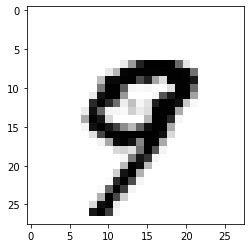

In [ ]:
plt.imshow(x_train[87],cmap='Greys')

plt.imshow()顯示圖像 cmap像素定義

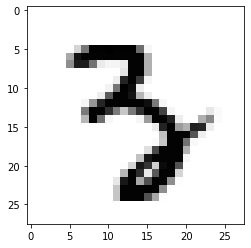

In [ ]:
plt.imshow(x_test[87],cmap='Greys')

In [ ]:
y_train[87]

9

確認x,y資料

In [ ]:
y_test[87]

3

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)

類別向量轉換為二進位（只有0和1）

one hot encoding

若y_train為7資料格式為(0,0,0,0,0,0,1,0,0)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
from keras.models import Sequential
#from keras import models
#network=models.Sequential
from keras import layers

In [ ]:
network=Sequential()

In [ ]:
network.add(layers.Dense(1024,activation='relu',input_shape=(28*28,))) #layers(類神經網路節點,激勵函數,丟入像素)
network.add(layers.Dense(512,activation='relu'))
network.add(layers.Dense(256,activation='relu'))
network.add(layers.Dense(10,activation='softmax'))

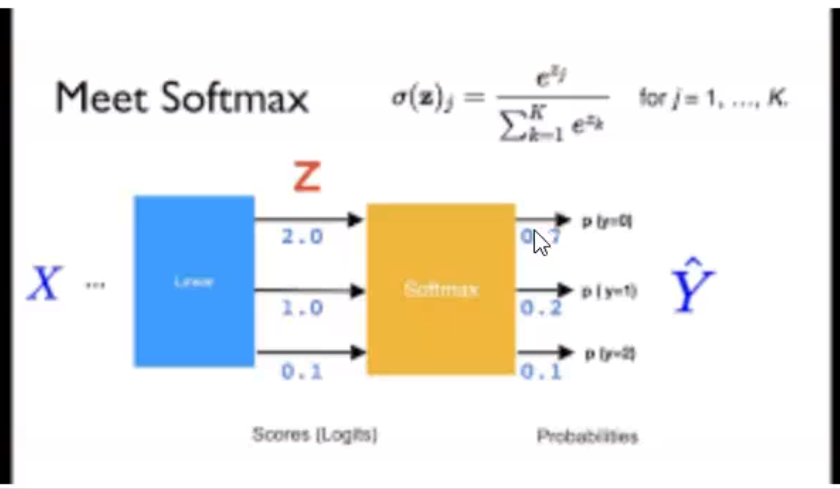

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

編譯給機器看(損失函數,優化函數,數值指標)

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network.fit(x_train.reshape(-1,28*28),y_train,epochs=5,batch_size=128)
#network.fit(x_train.reshape,y_train,epochs局,切片)

Epoch 1/5
469/469 [==============================] - 15s 31ms/step - loss: 1.8952 - accuracy: 0.9037
Epoch 2/5
469/469 [==============================] - 14s 31ms/step - loss: 0.1386 - accuracy: 0.9628
Epoch 3/5
469/469 [==============================] - 14s 31ms/step - loss: 0.0927 - accuracy: 0.9733
Epoch 4/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0779 - accuracy: 0.9775
Epoch 5/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0799 - accuracy: 0.9776


切片*469大約等於y_train()60000筆資料

In [ ]:
predict=network.predict(x_test.reshape(-1,28*28))

In [ ]:
predict[87] #y_test[87]

array([7.1865437e-11, 8.6347619e-08, 7.3437749e-11, 9.9892128e-01,
       1.1897739e-08, 1.0786477e-03, 5.3335952e-10, 2.9439548e-08,
       8.6470803e-10, 9.0714405e-09], dtype=float32)

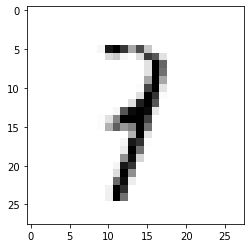

In [ ]:
plt.imshow(x_test[1500],cmap="Greys")

In [ ]:
predict[1500]

array([1.43085226e-05, 6.24989688e-01, 1.14915214e-01, 3.39902118e-02,
       6.56604320e-02, 7.07920757e-04, 4.26198142e-07, 1.17069393e-01,
       3.57511342e-02, 6.90122135e-03], dtype=float32)

In [ ]:
y_test[1500]

7

In [ ]:
np.nonzero(predict!=y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([0]),)

In [ ]:
np.count_nonzero(predict!=y_test)/len(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


0.0001

錯誤率，預測值錯誤個數/所有y_test個數

In [ ]:
network.evaluate(x_test.reshape(-1,28*28),to_categorical(y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.1620 - accuracy: 0.9656


[0.16196197271347046, 0.9656000137329102]

1-np.count_nonzero(predict!=y_test)/len(y_test)

network計算成功率

In [ ]:
network.save('my_model_weight.h5')
from keras import models
new_network=models.load_model('my_model_weight.h5')

network.save儲存模型及參數

定義new_network為儲存模型及參數

In [ ]:
new_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [ ]:
aaa=network.to_json()
open('my_model.json','w').write(aaa)

2013

模型儲存

In [ ]:
open('my_model.json','w').write(network.to_json())

2013

儲存json至雲端

In [ ]:
aaa=open('my_model.json','r').read()
new_network=models.model_from_json(aaa)

In [ ]:
new_network.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7ff0ab11cf10>>

讀取模型

In [ ]:
from keras.utils.np_utils import to_categorical
new_network.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
new_network.evaluate(x_test.reshape(-1,28*28),to_categorical(y_test))

313/313 [==============================] - 2s 6ms/step - loss: 79.3766 - accuracy: 0.0655


[79.3765869140625, 0.06549999862909317]

In [ ]:
network.save_weights('my_weights.h5') #參數儲存

In [ ]:
new_network.save_weights('my_weights.h5') #參數讀取

In [ ]:
new_network.evaluate(x_test.reshape(-1,28*28),to_categorical(y_test))

313/313 [==============================] - 2s 6ms/step - loss: 79.3766 - accuracy: 0.0655


[79.3765869140625, 0.06549999862909317]